# Regression Model

## Linear Regression

**Linear regression** is a simple machine learning method that can be used to predict an observation's value based on the relationship between target variable and independent, linearly-related numeric predictive features.   Within linear regression, there's simple linear regression where there's one predictor and one predictant, and there's multiple linear regression where there's multiple predictors and one predictant.

**Assumptions:**
- All variables are continuous numerical.
- The data is free of missing values and outliers.
- There's a linear relationship between features and target.
- All features are independent of one another.
- Residuals are normally distributed.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression

from sklearn import datasets

from collections import Counter

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8

### Simple Linear Regression

In [19]:
x = abs(np.random.randn(100,1)* np.random.randint(10))
x

array([[3.20937912e+00],
       [6.41734253e+00],
       [1.29524057e+01],
       [9.84636886e+00],
       [9.40226976e+00],
       [2.41018830e+00],
       [3.95947937e+00],
       [1.31008340e+00],
       [7.38457642e-01],
       [1.42956843e+01],
       [5.27733055e+00],
       [1.18585577e+01],
       [7.68964422e-01],
       [6.55481049e+00],
       [5.58525783e+00],
       [1.62922794e+00],
       [5.98567621e+00],
       [5.93901432e+00],
       [4.97877991e-03],
       [7.71207073e+00],
       [2.91713375e+00],
       [2.57327278e-02],
       [1.87429400e+01],
       [7.88209932e-01],
       [1.17428394e+01],
       [1.70646713e+01],
       [1.94313243e+01],
       [3.02716729e+00],
       [2.30642207e+01],
       [2.05879038e+01],
       [1.93791861e+00],
       [9.22914647e-01],
       [7.71681075e+00],
       [3.01689542e+00],
       [1.93875370e+00],
       [2.98357059e+00],
       [9.23065306e+00],
       [9.11681730e+00],
       [1.20433434e+01],
       [2.40010023e+01],


In [20]:
target = np.random.randint(150) + np.random.randint(20)*x
target

array([[ 83.67503296],
       [109.33874022],
       [161.61924547],
       [136.77095092],
       [133.21815808],
       [ 77.2815064 ],
       [ 89.67583494],
       [ 68.48066718],
       [ 63.90766114],
       [172.36547405],
       [100.21864439],
       [152.86846156],
       [ 64.15171537],
       [110.43848393],
       [102.68206263],
       [ 71.03382354],
       [105.88540964],
       [105.51211459],
       [ 58.03983024],
       [119.69656581],
       [ 81.33706999],
       [ 58.20586182],
       [207.94351978],
       [ 64.30567945],
       [151.94271494],
       [194.51737033],
       [213.45059459],
       [ 82.21733834],
       [242.51376551],
       [222.70323041],
       [ 73.5033489 ],
       [ 65.38331718],
       [119.73448601],
       [ 82.13516337],
       [ 73.51002957],
       [ 81.8685647 ],
       [131.84522447],
       [130.93453843],
       [154.3467476 ],
       [250.00801867],
       [106.39888157],
       [122.51129028],
       [247.24658581],
       [155

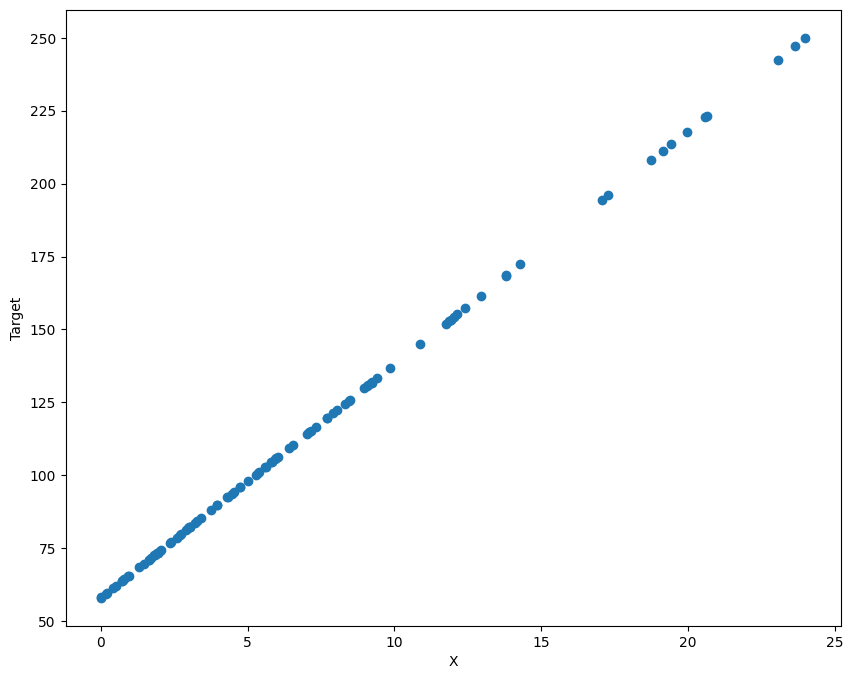

In [21]:
plt.scatter(x, target)

plt.xlabel('X')
plt.ylabel('Target')

plt.show()

In [22]:
lin_model = LinearRegression()

lin_model.fit(x,target)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
lin_model.score(x, target) #to be used later using test 

1.0

In [23]:
lin_model.intercept_ , lin_model.coef_

(array([58.]), array([[8.]]))

In [26]:
for i,j in enumerate(x):
    print(j * 8 + 58, target[i])

[83.67503296] [83.67503296]
[109.33874022] [109.33874022]
[161.61924547] [161.61924547]
[136.77095092] [136.77095092]
[133.21815808] [133.21815808]
[77.2815064] [77.2815064]
[89.67583494] [89.67583494]
[68.48066718] [68.48066718]
[63.90766114] [63.90766114]
[172.36547405] [172.36547405]
[100.21864439] [100.21864439]
[152.86846156] [152.86846156]
[64.15171537] [64.15171537]
[110.43848393] [110.43848393]
[102.68206263] [102.68206263]
[71.03382354] [71.03382354]
[105.88540964] [105.88540964]
[105.51211459] [105.51211459]
[58.03983024] [58.03983024]
[119.69656581] [119.69656581]
[81.33706999] [81.33706999]
[58.20586182] [58.20586182]
[207.94351978] [207.94351978]
[64.30567945] [64.30567945]
[151.94271494] [151.94271494]
[194.51737033] [194.51737033]
[213.45059459] [213.45059459]
[82.21733834] [82.21733834]
[242.51376551] [242.51376551]
[222.70323041] [222.70323041]
[73.5033489] [73.5033489]
[65.38331718] [65.38331718]
[119.73448601] [119.73448601]
[82.13516337] [82.13516337]
[73.51002957] 

### Multiple Linear Regression

In [3]:
features = 6

x,y = datasets.make_regression(n_features=features, n_samples = 100, noise=0)

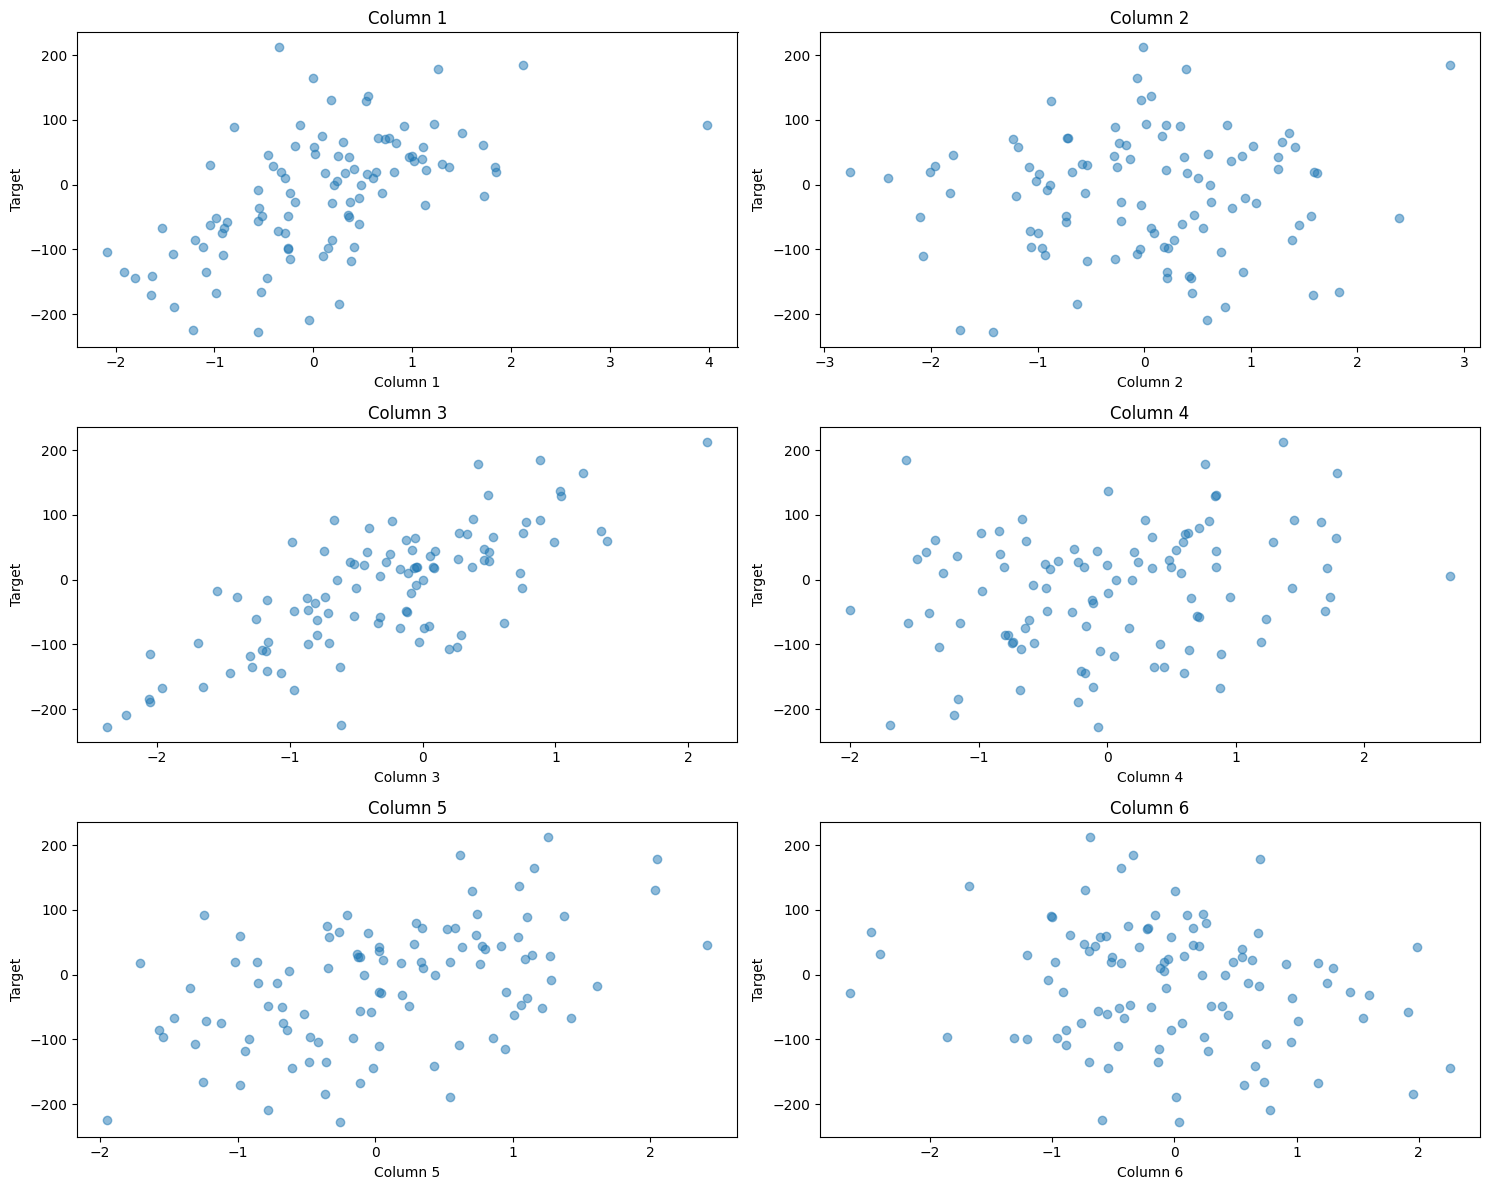

In [4]:
data = pd.DataFrame(x, columns=[f'Column {i+1}' for i in range(features)])

cols = 2
rows = 3

# 3. Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten to iterate easily

for i, col_name in enumerate(data.columns):
    axes[i].scatter(data[col_name], y, alpha=0.5)
    axes[i].set_title(f'{col_name}')
    axes[i].set_xlabel(col_name)
    axes[i].set_ylabel('Target')

# 4. Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [5]:
data['Target'] = y

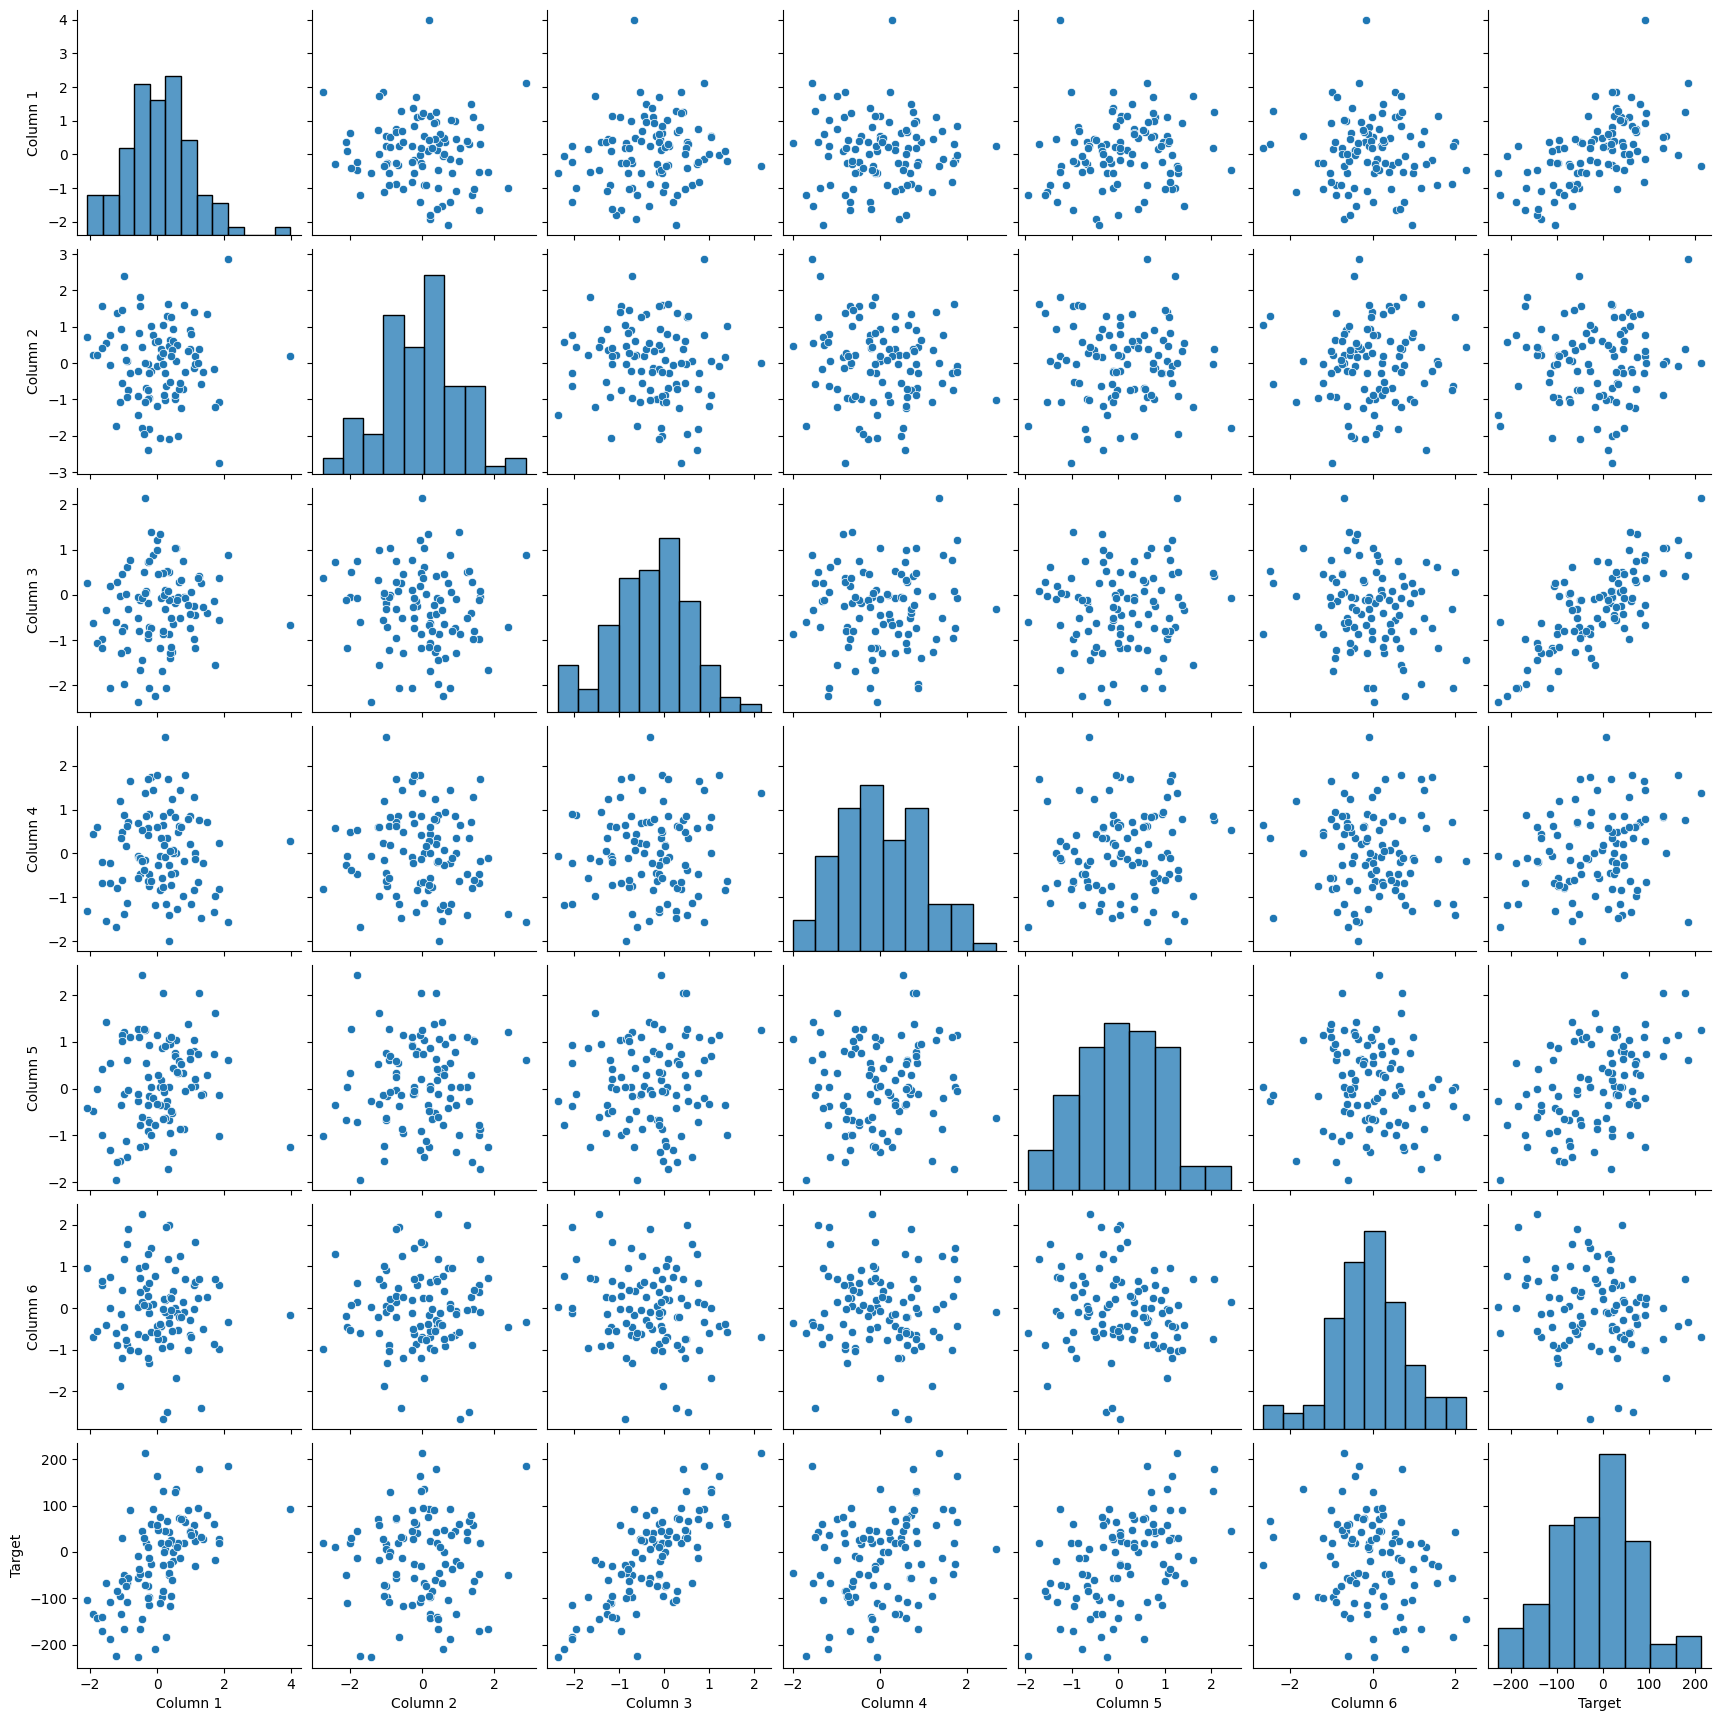

In [6]:
sns.pairplot(data)

In [7]:
data.corr()

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Target
Column 1,1.000000,-0.042043,0.112833,-0.001153,0.133388,-0.049024,0.580554
Column 2,-0.042043,1.000000,-0.093415,-0.121719,-0.000858,0.002996,0.041131
Column 3,0.112833,-0.093415,1.000000,0.051621,0.069560,-0.202852,0.756233
Column 4,-0.001153,-0.121719,0.051621,1.000000,0.083390,-0.036293,0.250056
Column 5,0.133388,-0.000858,0.069560,0.083390,1.000000,-0.127203,0.462378
Column 6,-0.049024,0.002996,-0.202852,-0.036293,-0.127203,1.000000,-0.204447
Target,0.580554,0.041131,0.756233,0.250056,0.462378,-0.204447,1.000000


In [10]:
features = data[['Column 1', 'Column 3', 'Column 4']]

x = scale(features)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [17]:
lin_reg_model = LinearRegression()

lin_reg_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
lin_reg_model.score(x_train, y_train)

0.8623555205387485

In [19]:
lin_reg_model.score(x_test, y_test)

0.876643201031702

In [21]:
lin_reg_model.coef_ , lin_reg_model.intercept_

(array([44.44671425, 63.66403274, 21.21178298]),
 np.float64(-14.814896814912233))

## Logistic Regression

Logistic regression is a simple machine learning method that can be used to predict the value of a numeric categorical variable based on its relationship with predictor variables.

Logistic regression differs from linear regression in that with logistic regression, categories are predicted for ordinal variables. While In linear regression, values are predicted for numeric, continuous variables. 

**Assumptions:**
- Data is free of missing values
- Target variable is binary
- All features are independent of each other
- There are at least 50 records [to ensure reliable results]. 

In the demonstration, I'm going to show you how to test your data to see if it meets the assumptions of this model. So, let's get started with logistic regression demonstration. Your Jupyter notebook is coming loaded with all of the basic libraries that we've been using for the course so far. So those are NumPy, Pandas, Seaborn, Matplotlib, and scikit-learn. I'm also going to be inputting the logistic regression model here, and we also need the metrics module, and that's to score out our predictive model. So, I'm going to set up your notebook with all of these so you don't have to type all this out, and then the notebo

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams

import sklearn as sk
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn import datasets

from collections import Counter

In [23]:
%matplotlib inline

rcParams['figure.figsize'] = 5,5

In [ ]:
#X, y = datasets.load_breast_cancer(return_X_y=True)

In [35]:
data = datasets.load_breast_cancer()

df = pd.DataFrame(data['data'], columns = data['feature_names'])
df['Target'] = data['target']

In [37]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [36]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [45]:
sum(df.isna().sum())

0

In [46]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838
